In [ ]:
# Colab connect drive

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
customers = pd.read_csv("/content/gdrive/Shareddrives/AI in Business/Dataset/olist_customers_dataset.csv")
geolocations = pd.read_csv("/content/gdrive/Shareddrives/AI in Business/Dataset/olist_geolocation_dataset.csv")
order_items = pd.read_csv("/content/gdrive/Shareddrives/AI in Business/Dataset/olist_order_items_dataset.csv")
orders = pd.read_csv("/content/gdrive/Shareddrives/AI in Business/Dataset/olist_orders_dataset.csv")
products = pd.read_csv("/content/gdrive/Shareddrives/AI in Business/Dataset/olist_products_dataset.csv")
sellers = pd.read_csv("/content/gdrive/Shareddrives/AI in Business/Dataset/olist_sellers_dataset.csv")
product_categories =  pd.read_csv("/content/gdrive/Shareddrives/AI in Business/Dataset/product_category_name_translation.csv")

# EDA

## DATA CLEANING

### Customers

In [ ]:
print(customers.shape)
customers.head()

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# Check the datatypes, NULL
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
# check duplicated
print(f"Numbers of duplicated in customers: {customers.duplicated().sum()}")

Numbers of duplicated in customers: 0


### Geolocation

In [ ]:
print(geolocations.shape)
geolocations.head()

(1000163, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
# Check the datatypes, NULL
geolocations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
# check duplicated
print(f"Numbers of duplicated in geolocations: {geolocations.duplicated().sum()}")

Numbers of duplicated in geolocations: 261831


### Order Item

In [ ]:
print(order_items.shape)
order_items.head()

(112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
# Change the datatype of time columns into Datetime
order_items['shipping_limit_date'] = pd.to_datetime(order_items.shipping_limit_date)
# Check the datatypes for each column
print(f'The datatypes for each column are:\n{order_items.dtypes}')

The datatypes for each column are:
order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object


In [ ]:
# check duplicated
print(f"Numbers of duplicated in order_items: {order_items.duplicated().sum()}")

Numbers of duplicated in order_items: 0


### Orders

In [ ]:
print(orders.shape)
orders.head()

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# Change the datatype of time columns into Datetime

orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp)
orders['order_approved_at'] = pd.to_datetime(orders.order_approved_at)
orders['order_delivered_carrier_date'] = pd.to_datetime(orders.order_delivered_carrier_date)
orders['order_delivered_customer_date'] = pd.to_datetime(orders.order_delivered_customer_date)
orders['order_estimated_delivery_date'] = pd.to_datetime(orders.order_estimated_delivery_date)

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
'''Giải thích tại sao những cột order_approved_at, order_delivered_carrier_date, order_delivered_customer_date lại có giá trị nulll'''

'Giải thích tại sao những cột order_approved_at, order_delivered_carrier_date, order_delivered_customer_date lại có giá trị nulll'

### Sellers

In [ ]:
print(sellers.shape)
sellers.head()

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
# check duplicated
print(f"Numbers of duplicated in sellers: {sellers.duplicated().sum()}")

Numbers of duplicated in sellers: 0


### Produtcs

In [ ]:
print(products.shape)
products.head()

(32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
print(product_categories.shape)
product_categories.head()

(71, 2)


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
# Check the number of null values in each column
null_values = product_categories.isnull().sum()
print(f'The number of null values in each column are:\n{null_values}')

The number of null values in each column are:
product_category_name            0
product_category_name_english    0
dtype: int64


In [ ]:
# Check the number of duplicate entries in the dataset
duplicate_entries = product_categories.duplicated().sum()
print(f'The number of duplicate entries in the dataset are:\n{duplicate_entries}')

The number of duplicate entries in the dataset are:
0


In [ ]:
# merge 2 dataframes
products = products.merge(product_categories, on='product_category_name', how='left')
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure


In [ ]:
# Checking the missing values
products.isna().sum()

product_id                         0
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64

In [ ]:
# Result
'''there are 623 missing values in product_category_name_english but there are just 610 missing values in product_category_name,
this indicates that there are 13 missing data in english name column but they are in the
product_category_name column, let's take a look !!'''

"there are 623 missing values in product_category_name_english but there are just 610 missing values in product_category_name,\nthis indicates that there are 13 missing data in english name column but they are in the\nproduct_category_name column, let's take a look !!"

In [ ]:
# looking 13 missing data in product_category_name_english
products[products['product_category_name'].notna() & products['product_category_name_english'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
1628,0105b5323d24fc655f73052694dbbb3a,pc_gamer,59.0,621.0,4.0,2839.0,19.0,16.0,18.0,NaN
5821,6fd83eb3e0799b775e4f946bd66657c0,portateis_cozinha_e_preparadores_de_alimentos,52.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
7325,5d923ead886c44b86845f69e50520c3e,portateis_cozinha_e_preparadores_de_alimentos,58.0,284.0,1.0,1200.0,25.0,33.0,25.0,NaN
7478,6727051471a0fc4a0e7737b57bff2549,pc_gamer,60.0,1532.0,3.0,650.0,16.0,22.0,20.0,NaN
8819,bed164d9d628cf0593003389c535c6e0,portateis_cozinha_e_preparadores_de_alimentos,54.0,382.0,2.0,850.0,30.0,21.0,22.0,NaN
11039,1220978a08a6b29a202bc015b18250e9,portateis_cozinha_e_preparadores_de_alimentos,46.0,280.0,1.0,1200.0,25.0,33.0,25.0,NaN
14266,ae62bb0f95af63d64eae5f93dddea8d3,portateis_cozinha_e_preparadores_de_alimentos,59.0,927.0,1.0,10600.0,40.0,20.0,38.0,NaN
16182,1954739d84629e7323a4295812a3e0ec,portateis_cozinha_e_preparadores_de_alimentos,58.0,792.0,4.0,750.0,30.0,30.0,30.0,NaN
16930,dbe520fb381ad695a7e1f2807d20c765,pc_gamer,60.0,840.0,6.0,800.0,18.0,22.0,22.0,NaN
17800,c7a3f1a7f9eef146cc499368b578b884,portateis_cozinha_e_preparadores_de_alimentos,52.0,1372.0,5.0,7350.0,40.0,30.0,23.0,NaN


In [ ]:
# filling the missing values in product_category_name_english where there are values in product_category_name
products['product_category_name_english'] = np.where(products["product_category_name"] == 'portateis_cozinha_e_preparadores_de_alimentos',
                                                     'kitchen_portable_and_food_preparers', products['product_category_name_english'])

products['product_category_name_english'] = np.where(products["product_category_name"] == 'pc_gamer',
                                                     'pc_gaming', products['product_category_name_english'])

In [ ]:
# filling the remain missing values in product_category_name and product_category_name_english with no_product_name
products['product_category_name'].fillna('not_defined_product', inplace= True)
products['product_category_name_english'].fillna('not_defined_product', inplace= True)

# filling with 0 for another missing numeric values
products.fillna(0, inplace=True)

# checking missing values again
products.isna().sum()

product_id                       0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [ ]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


## SIMPLE ANALYZE

In [ ]:
# Simple analyze with customer

from collections import Counter

counter = Counter(customers['customer_city'])
most_common = counter.most_common(1)  # Lấy phần tử có tần suất cao nhất
print("Nơi khách hàng phân bố nhiều nhất:", most_common[0][0])
print(f"Số khách hàng ở tại thành phố {most_common[0][0]}:", most_common[0][1])


counter = Counter(customers['customer_city'])
least_common = counter.most_common()[:-2:-1]  # Lấy phần tử có tần suất cao nhất
print("Nơi khách hàng phân bố ít nhất:", least_common[0][0])
print(f"Số khách hàng ở tại thành phố {least_common[0][0]}:", least_common[0][1])

Nơi khách hàng phân bố nhiều nhất: sao paulo
Số khách hàng ở tại thành phố sao paulo: 15540
Nơi khách hàng phân bố ít nhất: eugenio de castro
Số khách hàng ở tại thành phố eugenio de castro: 1


In [ ]:
# Simple analyze with geolocation
len(geolocations['geolocation_city'].unique())

8011

In [ ]:
# Unique order ID, productID in order_item
print(f"Unique Order ID: {len(order_items['order_id'].unique())}")
print(f"Unique productID: {len(order_items['product_id'].unique())}")

Unique Order ID: 98666
Unique productID: 32951


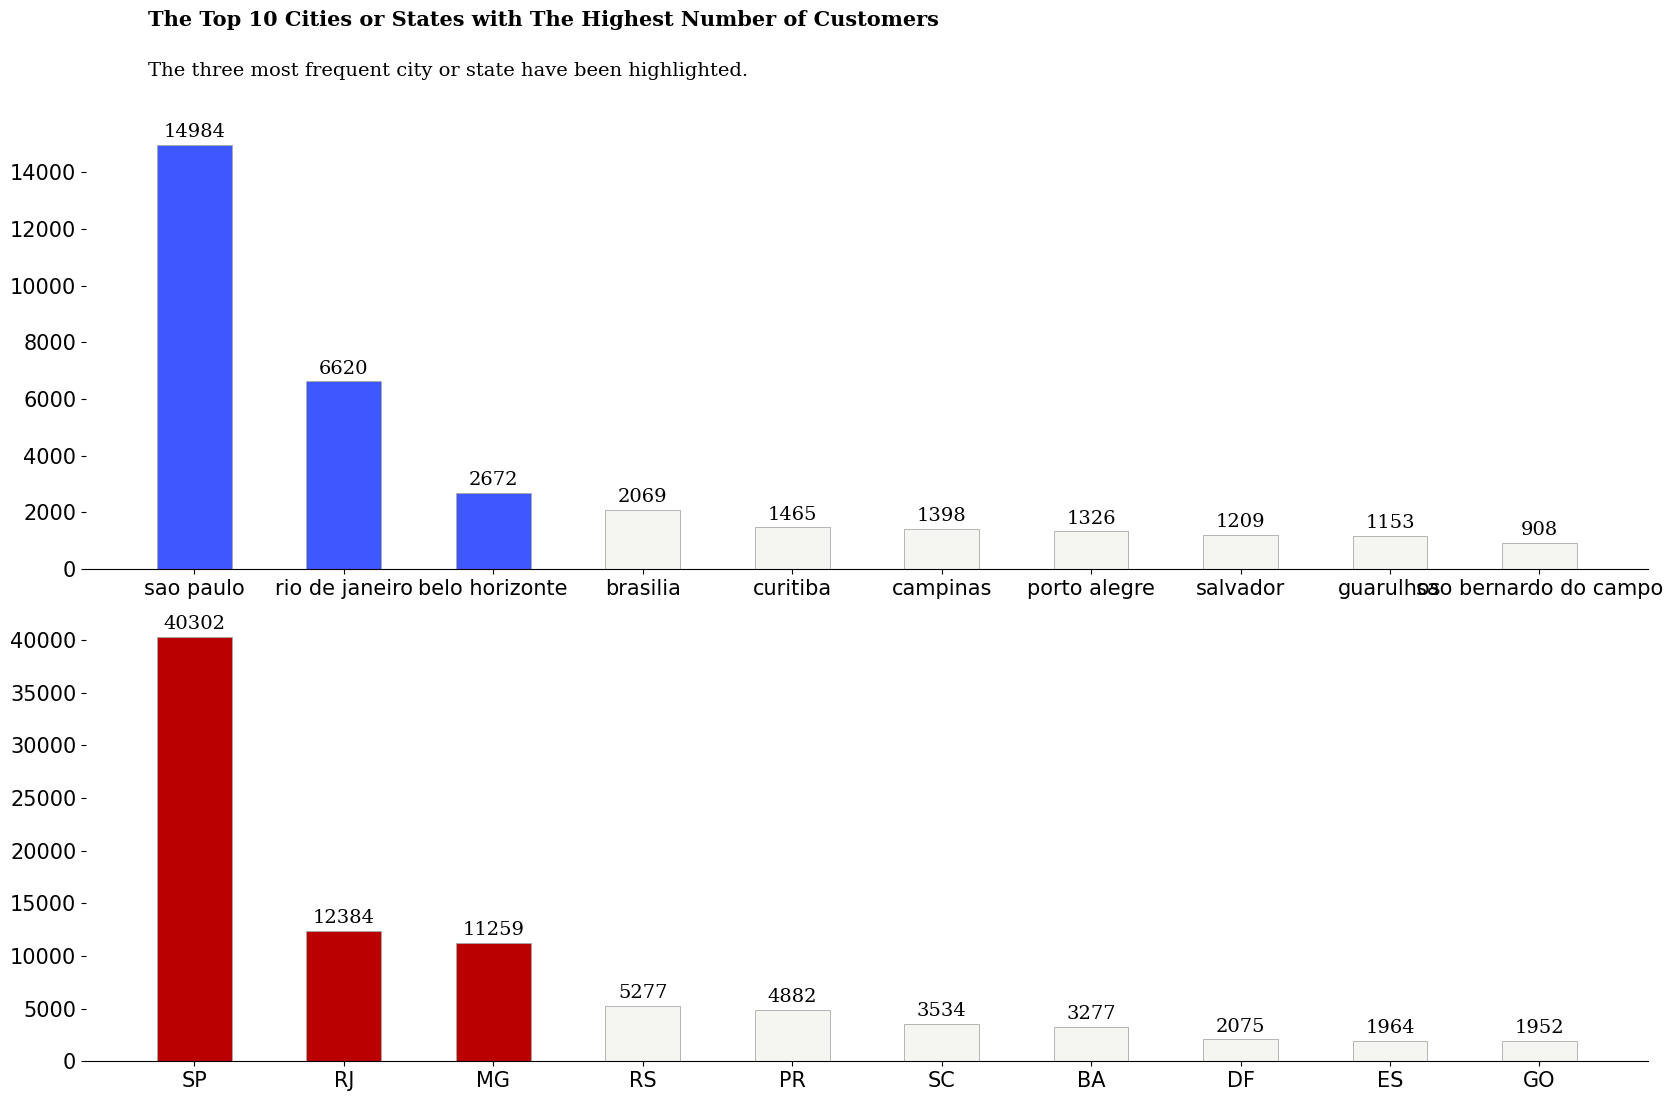

In [ ]:
# top locations's customers

top_city = customers.groupby('customer_city')['customer_unique_id'].nunique().sort_values(ascending=False)[:10]
top_state = customers.groupby('customer_state')['customer_unique_id'].nunique().sort_values(ascending=False)[:10]

# Plot
color_map1 = ['#f5f5f1' for _ in range(10)]
color_map1[:3] = ['#3f57ff', '#3f57ff', '#3f57ff']  # color highlight for top 3
color_map2 = ['#f5f5f1' for _ in range(10)]
color_map2[:3] = ['#ba0100', '#ba0100', '#ba0100']  # color highlight for top 3


fig, ax = plt.subplots(2,1 , figsize=(17, 10))

ax[0].bar([str(idx) for idx in top_city.index], top_city, width=0.5,
              edgecolor='darkgray',
              linewidth=0.6, color=color_map1)

ax[1].bar([str(idx) for idx in top_state.index], top_state, width=0.5,
              edgecolor='darkgray',
              linewidth=0.6, color=color_map2)

# Annotations
highest1 = top_city.max() * 0.03 # Set annotation height as 5% of the highest category
highest2 = top_state.max() * 0.03

for i, val in enumerate(top_city):
    ax[0].annotate(f"{val}",
                xy=(i, val + highest1),
                va='center', ha='center', fontweight='light', fontfamily='serif', fontsize=14)

for i, val in enumerate(top_state):
    ax[1].annotate(f"{val}",
                xy=(i, val + highest2),
                va='center', ha='center', fontweight='light', fontfamily='serif', fontsize=14)

# Remove border from plot
for s in ['top', 'left', 'right']:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)

fig.text(0.09, 1.08, 'The Top 10 Cities or States with The Highest Number of Customers', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 1.03, 'The three most frequent city or state have been highlighted.', fontsize=14, fontweight='light', fontfamily='serif')

# Tick labels with increased font size
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

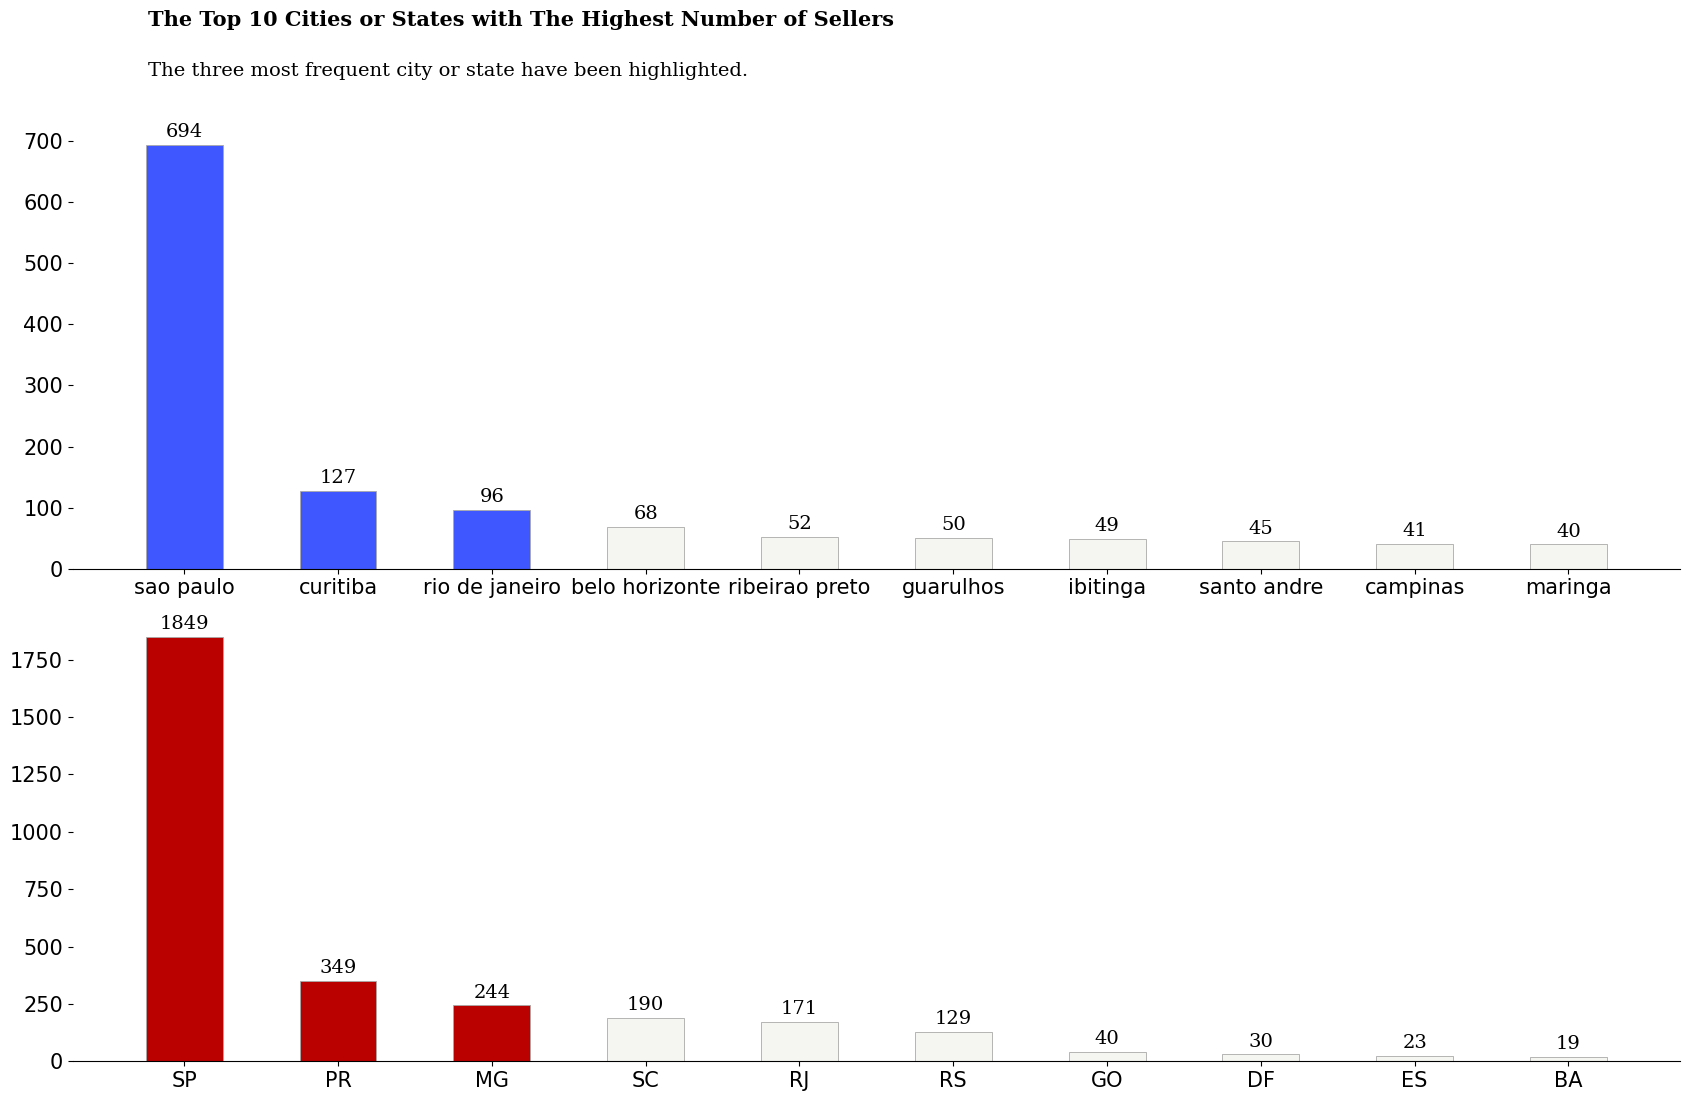

In [ ]:
# top locations's sellers

top_seller_city = sellers.groupby('seller_city')['seller_id'].nunique().sort_values(ascending=False)[:10]
top_seller_state = sellers.groupby('seller_state')['seller_id'].nunique().sort_values(ascending=False)[:10]

# Plot
color_map1 = ['#f5f5f1' for _ in range(10)]
color_map1[:3] = ['#3f57ff', '#3f57ff', '#3f57ff']  # color highlight for top 3
color_map2 = ['#f5f5f1' for _ in range(10)]
color_map2[:3] = ['#ba0100', '#ba0100', '#ba0100']  # color highlight for top 3

fig, ax = plt.subplots(2,1 , figsize=(17, 10))

ax[0].bar([str(idx) for idx in top_seller_city.index], top_seller_city, width=0.5,
              edgecolor='darkgray',
              linewidth=0.6, color=color_map1)

ax[1].bar([str(idx) for idx in top_seller_state.index], top_seller_state, width=0.5,
              edgecolor='darkgray',
              linewidth=0.6, color=color_map2)

# Annotations
highest1 = top_seller_city.max() * 0.03 # Set annotation height as 5% of the highest category
highest2 = top_seller_state.max() * 0.03

for i, val in enumerate(top_seller_city):
    ax[0].annotate(f"{val}",
                xy=(i, val + highest1),
                va='center', ha='center', fontweight='light', fontfamily='serif', fontsize=14)

for i, val in enumerate(top_seller_state):
    ax[1].annotate(f"{val}",
                xy=(i, val + highest2),
                va='center', ha='center', fontweight='light', fontfamily='serif', fontsize=14)

# Remove border from plot
for s in ['top', 'left', 'right']:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)

fig.text(0.09, 1.08, 'The Top 10 Cities or States with The Highest Number of Sellers', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 1.03, 'The three most frequent city or state have been highlighted.', fontsize=14, fontweight='light', fontfamily='serif')

# Tick labels with increased font size
ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)

plt.tight_layout()
plt.show()

In [ ]:
# How many orders occured ? (based on the time of purchase)

print(orders['order_purchase_timestamp'].sort_values(ascending=False))

60938   2018-10-17 17:30:18
68373   2018-10-16 20:16:02
31891   2018-10-03 18:55:29
88500   2018-10-01 15:30:09
50387   2018-09-29 09:13:03
                ...        
83078   2016-10-02 22:07:52
30710   2016-09-15 12:16:38
10071   2016-09-13 15:24:19
4396    2016-09-05 00:15:34
4541    2016-09-04 21:15:19
Name: order_purchase_timestamp, Length: 99441, dtype: datetime64[ns]


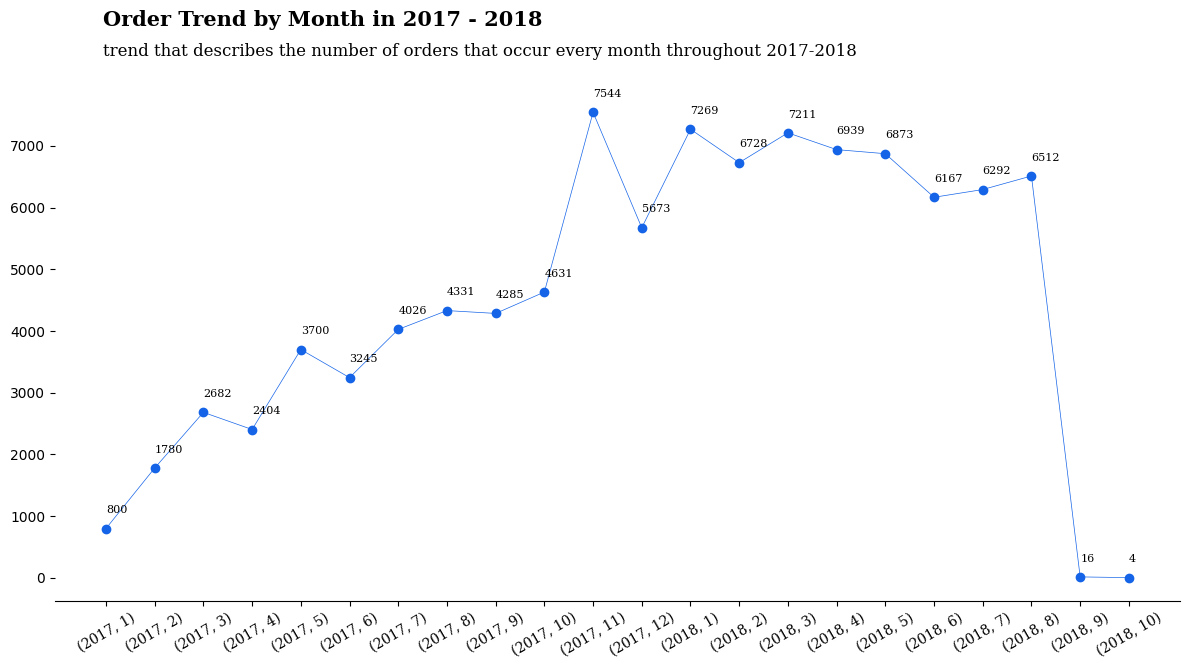

In [ ]:
# Trend orders - following Months

orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['month'] = orders['order_purchase_timestamp'].dt.month
orders['month_name'] = orders['order_purchase_timestamp'].dt.strftime('%B')
orders['day'] = orders['order_purchase_timestamp'].dt.day
orders['day_of_week'] = orders['order_purchase_timestamp'].dt.dayofweek
orders['day_name'] = orders['order_purchase_timestamp'].dt.strftime('%A')
orders['hour'] = orders['order_purchase_timestamp'].dt.hour
orders['timeday'] = pd.cut(orders['order_purchase_timestamp'].dt.hour, bins=[0, 6, 12, 18, 24], labels=['Dawn', 'Morning', 'Afternoon', 'Night'])


trend = orders[orders['year'] != 2016].groupby(['year', 'month'])['order_id'].nunique()

fig, ax = plt.subplots(figsize=(12, 6))
line = ax.plot([str(idx) for idx in trend.index], trend, linewidth=0.5, color='#1564e8', marker='o')

# Annotations
highest = trend.max() * 0.05  # Set annotation height as 5% of the highest category
for i, val in enumerate(trend):
    ax.annotate(f"{round(val, 2)}",
                xy=(i, val + highest),
                va='top', ha='left', fontweight='light', fontfamily='serif', fontsize=8)

# Remove border from plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)

fig.text(0.09, 1.08, 'Order Trend by Month in 2017 - 2018 ', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 1.03, 'trend that describes the number of orders that occur every month throughout 2017-2018', fontsize=12, fontweight='light', fontfamily='serif')

# Tick labels
plt.xticks(fontfamily='serif', rotation=30)

plt.tight_layout()
plt.show()

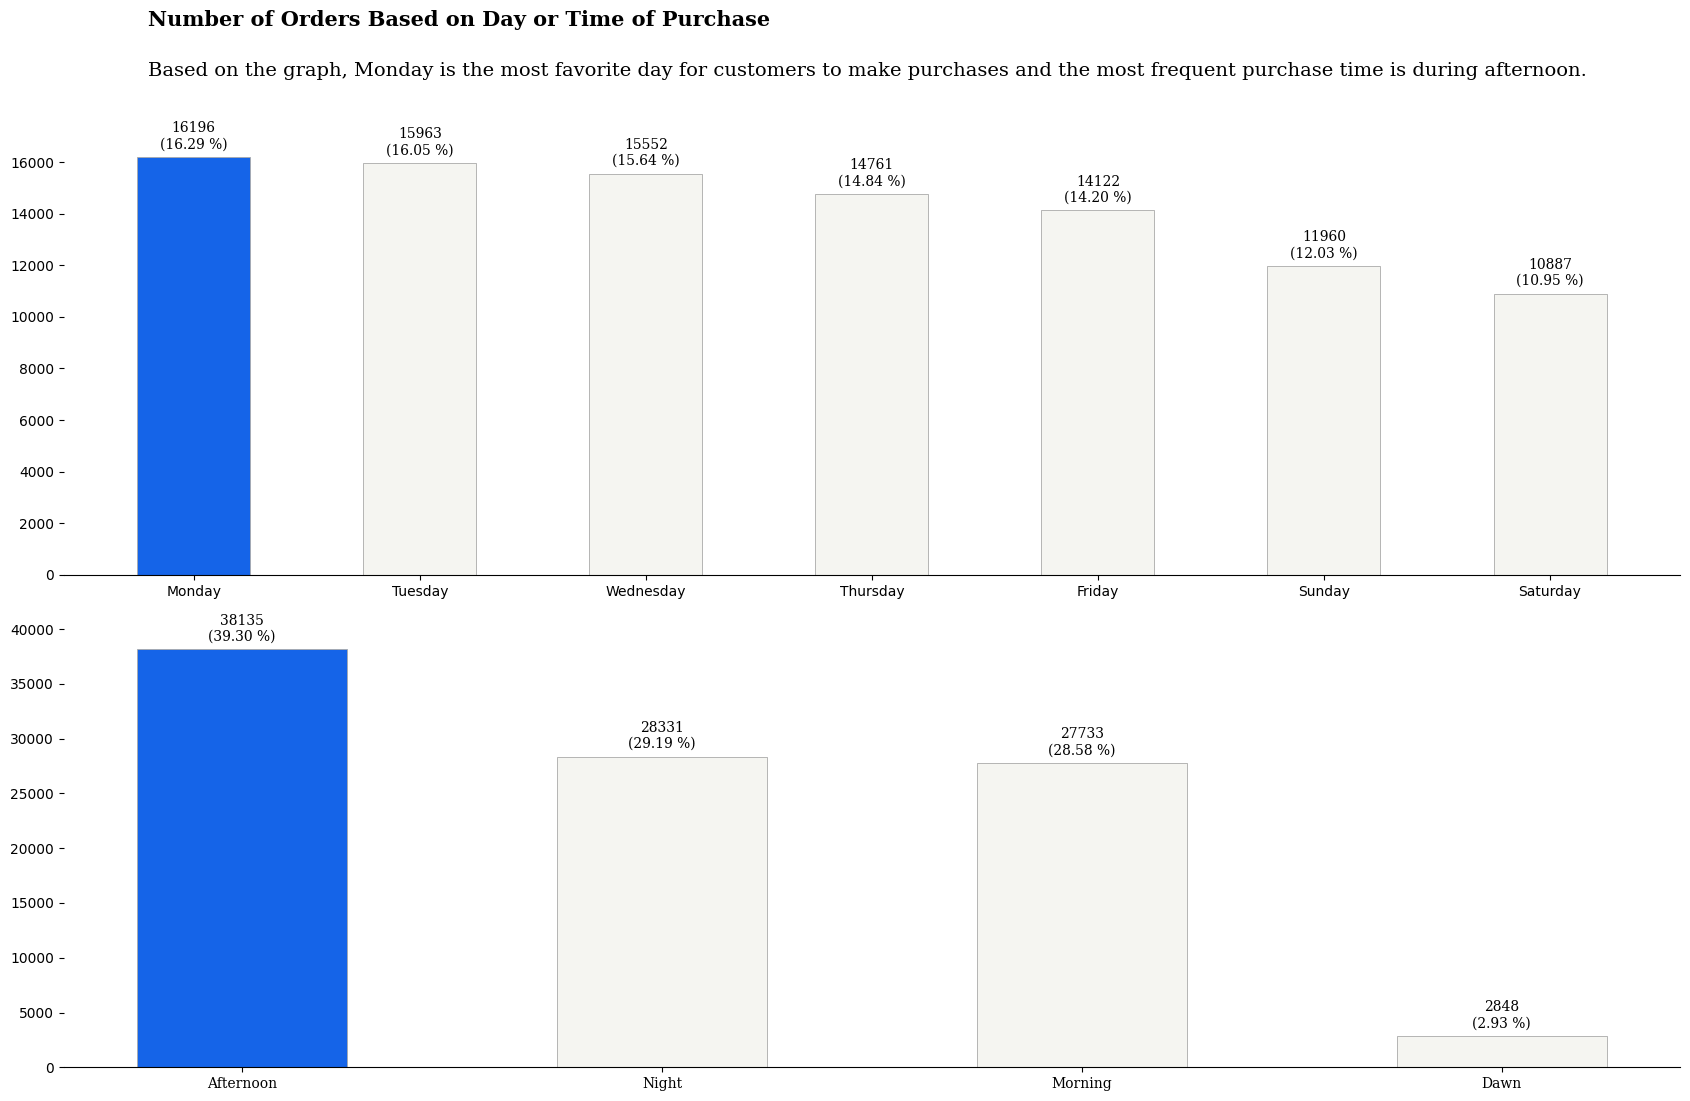

In [ ]:
# Trend orders - following Week, Day

dayname = orders.groupby('day_name')['order_id'].nunique().sort_values(ascending=False)
timeday = orders.groupby('timeday')['order_id'].nunique().sort_values(ascending=False)

# Plot
color_map1 = ['#f5f5f1' for _ in range(len(dayname))]
color_map2 = ['#f5f5f1' for _ in range(len(timeday))]

color_map1[0] = '#1564e8'  # color highlight for top 1
color_map2[0] = '#1564e8'

fig, ax = plt.subplots(2,1 , figsize=(17, 10))

ax[0].bar([str(idx) for idx in dayname.index], dayname, width=0.5,
              edgecolor='darkgray',
              linewidth=0.6, color=color_map1)

ax[1].bar([str(idx) for idx in timeday.index], timeday, width=0.5,
              edgecolor='darkgray',
              linewidth=0.6, color=color_map2)

# Annotations
highest1 = dayname.max() * 0.05 # Set annotation height as 5% of the highest category
highest2 = timeday.max() * 0.05

total1 = dayname.sum()
total2 = timeday.sum()

for i, val in enumerate(dayname):
    percentage = (val / total1) * 100
    ax[0].annotate(f"{val}\n({percentage:.2f} %)",
                xy=(i, val + highest1),
                va='center', ha='center', fontweight='light', fontfamily='serif')

for i, val in enumerate(timeday):
    percentage = (val / total2) * 100
    ax[1].annotate(f"{val}\n({percentage:.2f} %)",
                xy=(i, val + highest2),
                va='center', ha='center', fontweight='light', fontfamily='serif')

# Remove border from plot
for s in ['top', 'left', 'right']:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)

fig.text(0.09, 1.08, 'Number of Orders Based on Day or Time of Purchase', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 1.03, 'Based on the graph, Monday is the most favorite day for customers to make purchases and the most frequent purchase time is during afternoon.', fontsize=14, fontweight='light', fontfamily='serif')

# Tick labels
plt.xticks(fontfamily='serif')

plt.tight_layout()
plt.show()

In [ ]:
# How many items, products or sellers in each order?

# create a new column total_price which is the sum of the price and freight_value columns
order_items['total_price'] = order_items['price'] + order_items['freight_value']

order_items.groupby('order_id').agg(
    order_item_count=('order_item_id', 'count'),
    total_price_sum=('total_price', 'sum'),
    unique_product=('product_id', 'nunique'),
    unique_seller=('seller_id', 'nunique')
).sort_values('unique_product', ascending=False)\
.reset_index().head()

,order_id,order_item_count,total_price_sum,unique_product,unique_seller
0,ca3625898fbd48669d50701aba51cd5f,10,1157.28,8,2
1,7d8f5bfd5aff648220374a2df62e84d5,7,582.94,7,1
2,77df84f9195be22a4e9cb72ca9e8b4c2,7,209.57,7,3
3,ad850e69fce9a512ada84086651a2e7d,7,1242.57,7,1
4,5efc0b7fe9df7f0c567404abaa4d25fc,6,469.20,6,1


# DEEP ANALYZE (DELIVERY PERFORMANCE)

### OTD - tỉ lệ giao hàng đúng hạn

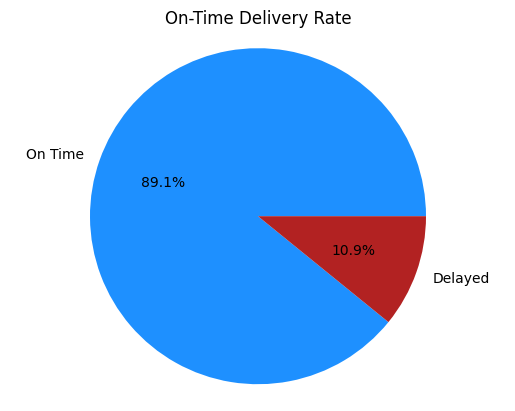

In [ ]:
# TỈ LỆ GIAO HÀNG ĐÚNG HẠN - OTD

# Merge relevant columns
merged_otd = pd.merge(orders, customers, on='customer_id')

# Calculate On-Time Delivery Rates
merged_otd['delivery_time'] = pd.to_datetime(merged_otd['order_delivered_customer_date']) - pd.to_datetime(merged_otd['order_estimated_delivery_date'])
merged_otd['on_time'] = merged_otd['delivery_time'] <= pd.Timedelta(0)
on_time_percentage = merged_otd['on_time'].value_counts(normalize=True) * 100

# Visualize the Results
labels = ['On Time', 'Delayed']
colors = ['#1e90ff', '#b22222']  # Màu sắc tương ứng với các nhãn
plt.pie(on_time_percentage, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title('On-Time Delivery Rate')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Average delivery time: 12.00 days


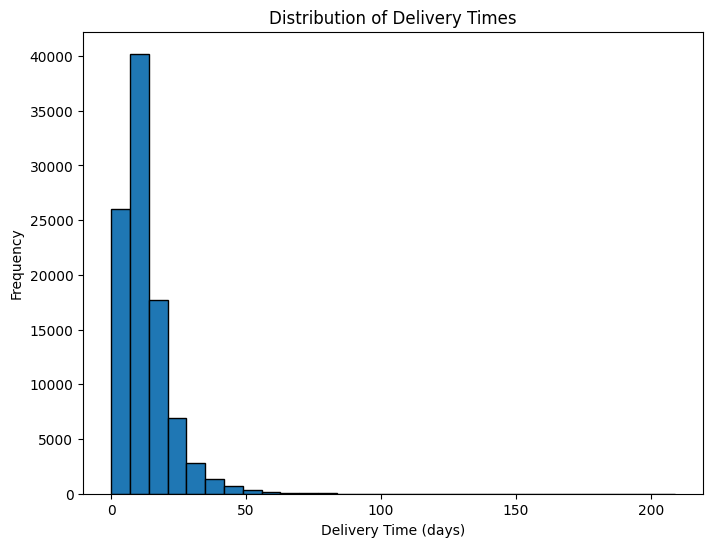

In [ ]:
# Calculate delivery time for each order
orders['delivery_time'] = orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']

# Calculate average delivery time
average_delivery_time = orders['delivery_time'].mean().days  # Get average in days

print(f"Average delivery time: {average_delivery_time:.2f} days")  # Round to 2 decimal places

# Visualize delivery times
plt.figure(figsize=(8, 6))
plt.hist(orders['delivery_time'].dt.days, bins=30, edgecolor='black')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Times')
plt.show()

### thời gian giao hàng trung bình (cycle time)

Average delivery time: 12.00 days


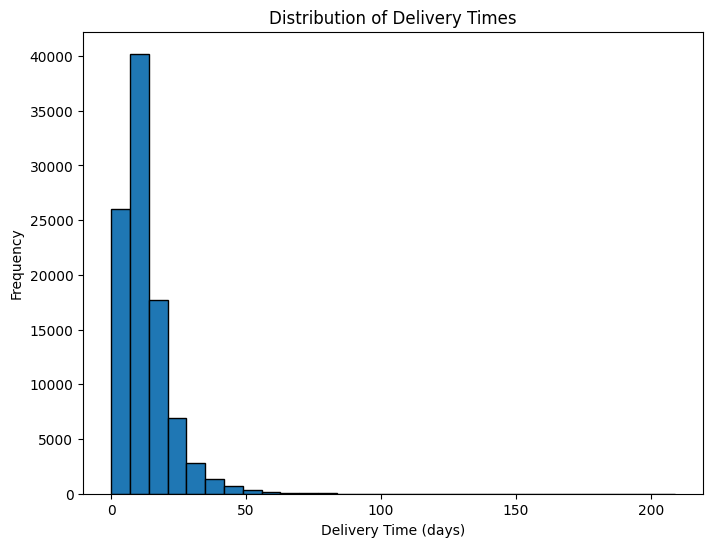

In [ ]:
# Calculate delivery time for each order
orders['delivery_time'] = orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']

# Calculate average delivery time
average_delivery_time = orders['delivery_time'].mean().days  # Get average in days

print(f"Average delivery time: {average_delivery_time:.2f} days")  # Round to 2 decimal places

# Visualize delivery times
plt.figure(figsize=(8, 6))
plt.hist(orders['delivery_time'].dt.days, bins=30, edgecolor='black')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Times')
plt.show()

### orders state

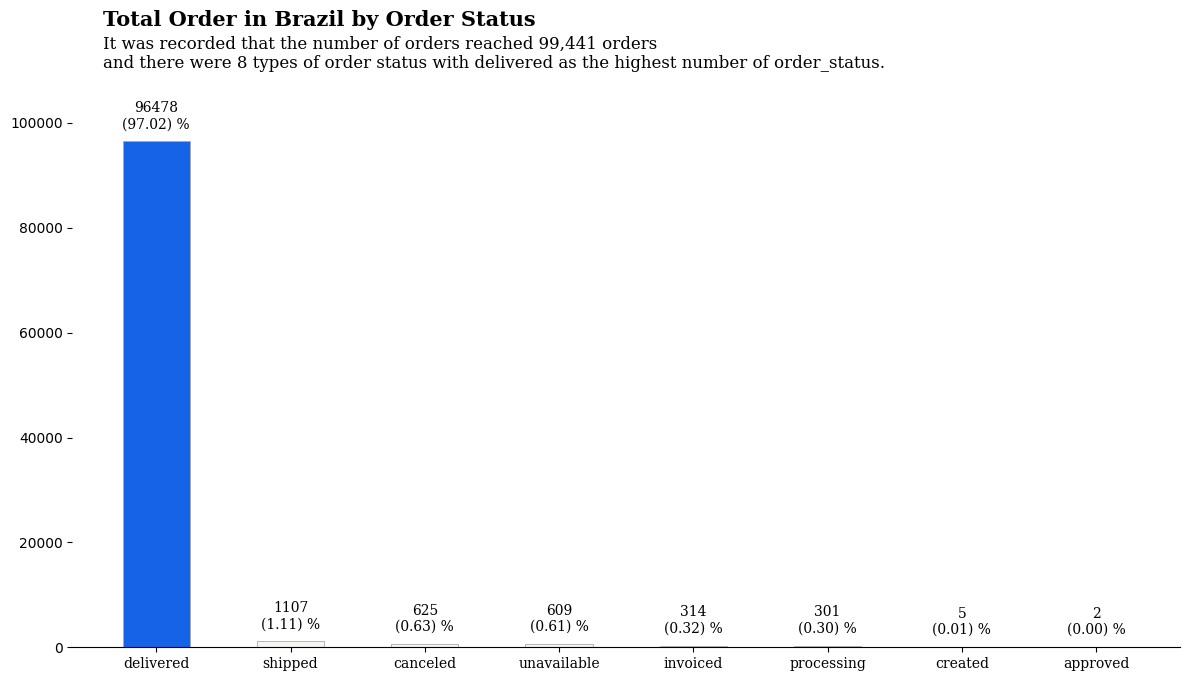

In [ ]:
data_orders_state = orders['order_status'].value_counts()

# Plot

color_map = ['#1564e8', '#f5f5f1', '#f5f5f1', '#f5f5f1', '#f5f5f1', '#f5f5f1', '#f5f5f1', '#f5f5f1']  # color highlight for the top

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar([str(idx) for idx in data_orders_state.index], data_orders_state, width=0.5,
              edgecolor='darkgray',
              linewidth=0.6, color=color_map)

# Annotations
highest = data_orders_state.max() * 0.05  # Set annotation height as 5% of the highest category
total = data_orders_state.sum()

for i, val in enumerate(data_orders_state):
    percentage = (val/total) * 100
    ax.annotate(f"{val}\n({percentage:.2f}) %",
                xy=(i, val + highest),
                va='center', ha='center', fontweight='light', fontfamily='serif')

# Remove border from plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)


fig.text(0.09, 1.1, 'Total Order in Brazil by Order Status', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.09, 1.03, 'It was recorded that the number of orders reached 99,441 orders \nand there were 8 types of order status with delivered as the highest number of order_status.', fontsize=12, fontweight='light', fontfamily='serif')

# Tick labels
plt.xticks(fontfamily='serif')

plt.tight_layout()
plt.show()

### ORDER FILL RATE

####Biểu đồ OFR

Order Fill Rate: 97.02%


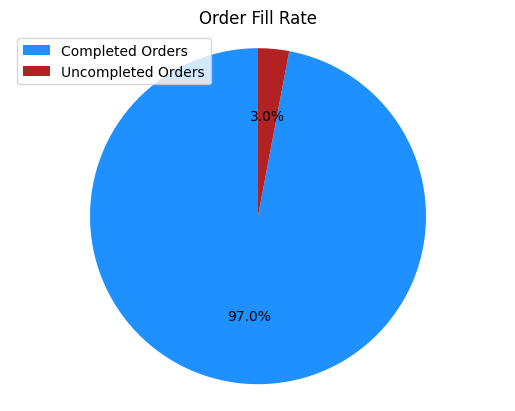

In [ ]:
# Kết hợp các bảng để tính OFR
merged_orf = pd.merge(orders, order_items, on='order_id', how='inner')

# Lọc các đơn hàng đã được giao đầy đủ
completed_orders = merged_orf[merged_orf['order_status'] == 'delivered']

# Tính tổng số lượng đơn hàng đã đặt
total_orders = orders['order_id'].nunique()

# Tính số lượng đơn hàng đã được giao đầy đủ
completed_order_count = completed_orders['order_id'].nunique()

# Tính OFR
order_fill_rate = (completed_order_count / total_orders) * 100

print(f"Order Fill Rate: {order_fill_rate:.2f}%")

# Trực quan hóa kết quả
sizes = [completed_order_count, total_orders - completed_order_count]
colors = ['#1e90ff', '#b22222']
#explode = (0.1, 0)  # Đẩy ra một phần tử để làm nổi bật

plt.pie(sizes, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Order Fill Rate')
plt.legend(labels=['Completed Orders', 'Uncompleted Orders'], loc='upper left')
plt.show()

#### Những sản phẩm trong 3% của biều đồ OFR

In [ ]:
# Số sản phẩm nằm trong 3% không được hoàn thành
incompleted_orders = merged_orf[merged_orf['order_status'] != 'delivered']
print(incompleted_orders['product_id'].nunique())

1869


In [ ]:
# Nhóm sản phẩm theo số lần không hoàn thành và lấy top 5 sản phẩm
top_incompleted_products = incompleted_orders.groupby('product_id').size().nlargest(5)

print("Top 5 sản phẩm có số lần không hoàn thành cao nhất:")
print(top_incompleted_products)

Top 5 sản phẩm có số lần không hoàn thành cao nhất:
product_id
0a57f7d2c983bcf8188589a5fea4a8da    18
7c1bd920dbdf22470b68bde975dd3ccf    11
99a4788cb24856965c36a24e339b6058    11
d1c427060a0f73f6b889a5c7c61f2ac4    11
154e7e31ebfa092203795c972e5804a6     7
dtype: int64


In [ ]:
# Chuyển Series thành DataFrame để làm việc dễ dàng hơn
top_incompleted_products_df = top_incompleted_products.reset_index(name='count')

# Kết hợp thông tin về tên sản phẩm từ bảng 'products'
merged__incomleted_top_products = pd.merge(top_incompleted_products_df, products[['product_id', 'product_category_name_english']], on='product_id', how='left')

# Đổi vị trí cột product_category_name_english
columns_order = ['product_id', 'product_category_name_english', 'count']
merged__incomleted_top_products = merged__incomleted_top_products[columns_order]

print("Những sản phẩm có nhiều tác động tiêu cực đến ORF:")
print(merged__incomleted_top_products)

Những sản phẩm có nhiều tác động tiêu cực đến ORF:
                         product_id product_category_name_english  count
0  0a57f7d2c983bcf8188589a5fea4a8da                 watches_gifts     18
1  7c1bd920dbdf22470b68bde975dd3ccf                 health_beauty     11
2  99a4788cb24856965c36a24e339b6058                bed_bath_table     11
3  d1c427060a0f73f6b889a5c7c61f2ac4         computers_accessories     11
4  154e7e31ebfa092203795c972e5804a6                 health_beauty      7


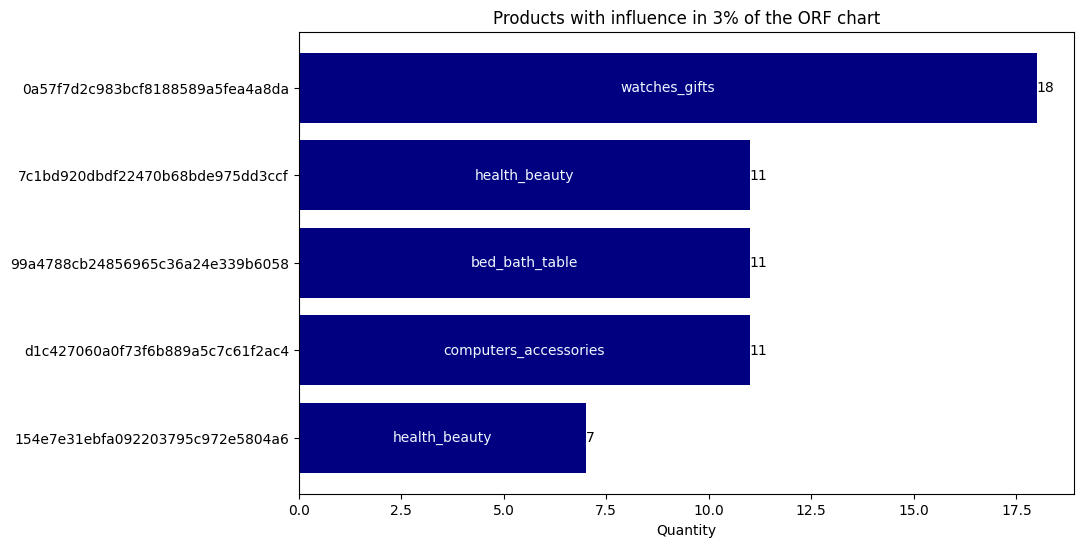

In [ ]:
# Vẽ biểu đồ cột cho số lần không hoàn thành của các sản phẩm
plt.figure(figsize=(10, 6))
bars = plt.barh(merged__incomleted_top_products['product_id'], merged__incomleted_top_products['count'], color='#000080')

# Thêm nhãn cho từng cột (số lần không hoàn thành)
plt.bar_label(bars, labels=merged__incomleted_top_products['count'], label_type='edge')

# Thêm tên sản phẩm lên trực tiếp trên các cột
plt.bar_label(bars, labels=merged__incomleted_top_products['product_category_name_english'], label_type='center', color='#f0f8ff')

plt.xlabel('Quantity')
#plt.ylabel('Product ID')
plt.title('Products with influence in 3% of the ORF chart')
plt.gca().invert_yaxis()  # Đảo ngược trục y để sản phẩm có số lần lớn nhất ở trên cùng
plt.show()

#### Nguyên do xảy ra 3%

In [ ]:
# order status != 'delivered'
incompleted_orders_df = pd.DataFrame(incompleted_orders)
incompleted_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2453 entries, 6 to 112512
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       2453 non-null   object         
 1   customer_id                    2453 non-null   object         
 2   order_status                   2453 non-null   object         
 3   order_purchase_timestamp       2453 non-null   datetime64[ns] 
 4   order_approved_at              2453 non-null   datetime64[ns] 
 5   order_delivered_carrier_date   1261 non-null   datetime64[ns] 
 6   order_delivered_customer_date  7 non-null      datetime64[ns] 
 7   order_estimated_delivery_date  2453 non-null   datetime64[ns] 
 8   year                           2453 non-null   int64          
 9   month                          2453 non-null   int64          
 10  month_name                     2453 non-null   object         
 11  da

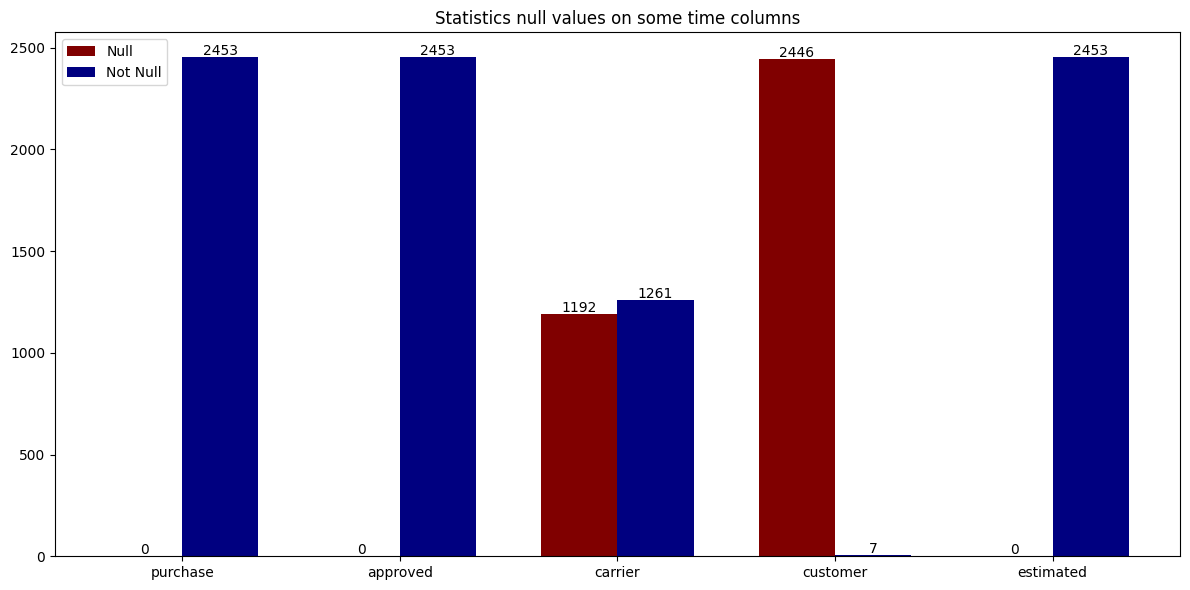

In [ ]:
# Chọn ra các cột theo chỉ mục tương ứng
selected_columns = incompleted_orders_df.iloc[:, [3, 4, 5, 6, 7]]

# Đếm số lượng giá trị null và không null trong các cột đã chọn
null_counts = selected_columns.isnull().sum()
not_null_counts = selected_columns.notnull().sum()

# Tạo dữ liệu cho biểu đồ cột
categories = selected_columns.columns.tolist()
null_values = null_counts.tolist()
not_null_values = not_null_counts.tolist()

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.35
index = range(len(categories))

bar1 = ax.bar(index, null_values, bar_width, label='Null', color='#800000')
bar2 = ax.bar([i + bar_width for i in index], not_null_values, bar_width, label='Not Null', color='#000080')

# Thêm số liệu cụ thể lên đỉnh mỗi cột
for i, v in enumerate(null_values):
    plt.text(i, v + 10, str(v), ha='center', color='black')

for i, v in enumerate(not_null_values):
    plt.text(i + bar_width, v + 10, str(v), ha='center', color='black')

new_labels = ['purchase', 'approved', 'carrier', 'customer', 'estimated']
#ax.set_xlabel('Columns')
#ax.set_ylabel('Number of Values')
ax.set_title('Statistics null values on some time columns')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(new_labels, rotation=0, ha='center')
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
"""
Giá trị null chỉ xuất hiện trên các cột 'order_delivered_carrier_date' và 'order_delivered_customer_date'

Trong đó:
- 'order_delivered_carrier_date': Hiển thị dấu thời gian đăng đơn hàng. Khi nó được xử lý cho đối tác logistic.
- 'order_delivered_customer_date': Hiển thị ngày giao hàng thực tế của đơn hàng cho khách hàng.

1192 giá trị null tại cột carrier --> là những đơn hàng chưa được giao đến cho đối tác logistic --> doanh nghiệp cần tim nguyên nhân
7 giá trị không null trong order_delivered_customer_date mặc dù đã lọc order status --> tìm nguyên nhân

Cần làm tiếp theo:
(1) những sản phẩm thường xuyên xuất hiện trong 1192 giá trị null tại cột carrier
(2) nguyên nhân xuất hiện 7 giá trị không null trong order_delivered_customer_date
(3) order status trong 1261 giá trị không null trong carrier
"""

"\nGiá trị null chỉ xuất hiện trên các cột 'order_delivered_carrier_date' và 'order_delivered_customer_date'\n\nTrong đó:\n- 'order_delivered_carrier_date': Hiển thị dấu thời gian đăng đơn hàng. Khi nó được xử lý cho đối tác logistic.\n- 'order_delivered_customer_date': Hiển thị ngày giao hàng thực tế của đơn hàng cho khách hàng.\n\n1192 giá trị null tại cột carrier --> là những đơn hàng chưa được giao đến cho đối tác logistic --> doanh nghiệp cần tim nguyên nhân\n7 giá trị không null trong order_delivered_customer_date mặc dù đã lọc order status --> tìm nguyên nhân\n\nCần làm tiếp theo:\n(1) những sản phẩm thường xuyên xuất hiện trong 1192 giá trị null tại cột carrier\n(2) nguyên nhân xuất hiện 7 giá trị không null trong order_delivered_customer_date\n(3) order status trong 1261 giá trị không null trong carrier\n"

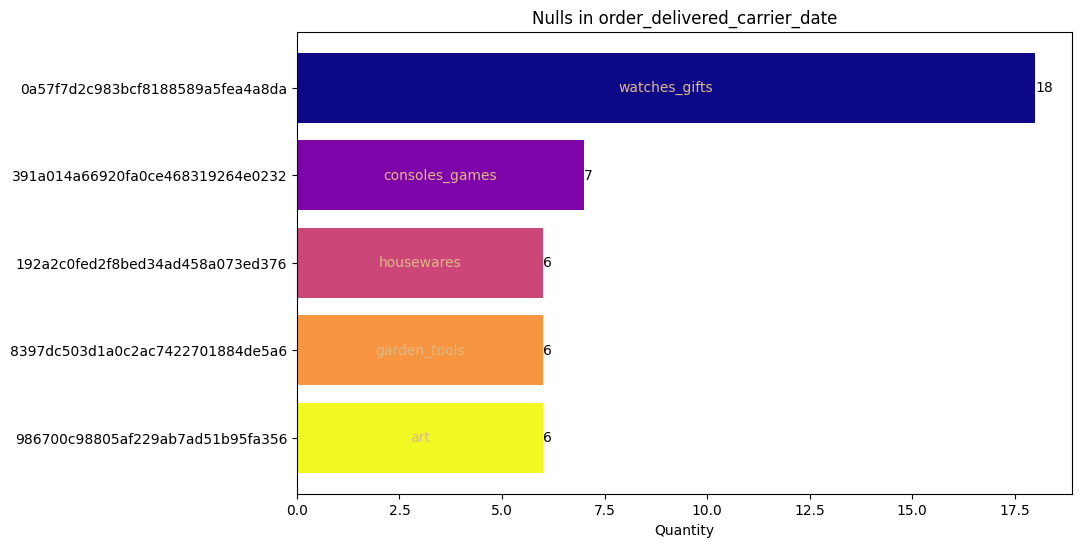

In [ ]:
# (1) những sản phẩm thường xuyên xuất hiện trong 1192 giá trị null tại cột carrier

# Lọc các dòng mà cột 'carrier' có giá trị null
null_carrier = incompleted_orders_df[incompleted_orders_df['order_delivered_carrier_date'].isnull()]

# Đếm số lần xuất hiện của từng sản phẩm và chọn ra 5 sản phẩm có tần suất xuất hiện cao nhất
top_5_products = null_carrier['product_id'].value_counts().head(5).reset_index()
top_5_products.columns = ['product_id', 'frequency']

# Kết hợp thông tin category từ bảng 'products'
top_5_products_with_category = pd.merge(top_5_products, products, on='product_id', how='left')

# Tạo một màu gradient trên số lượng sản phẩm
colors = plt.cm.plasma(np.linspace(0, 1, len(top_5_products_with_category)))

# Vẽ biểu đồ trực quan hóa kết quả
plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_products_with_category['product_id'], top_5_products_with_category['frequency'], color=colors)
plt.xlabel('Quantity')
plt.title('Nulls in order_delivered_carrier_date')
plt.gca().invert_yaxis()  # Đảo ngược trục y để sản phẩm có số lần lớn nhất ở trên cùng

# Thêm nhãn
plt.bar_label(bars, labels=top_5_products_with_category['product_category_name_english'], label_type='center', color='#deb887')
plt.bar_label(bars, labels=top_5_products_with_category['frequency'].astype(str), label_type='edge', color='black')

plt.show()

In [ ]:
# (2) nguyên nhân xuất hiện 7 giá trị không null trong order_delivered_customer_date

# Lọc những dòng có giá trị không null trong cột 'order_delivered_customer_date'
not_null_rows = incompleted_orders_df[incompleted_orders_df['order_delivered_customer_date'].notnull()]

# Hiển thị những dòng có giá trị không null
not_null_rows

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,year,month,...,hour,timeday,delivery_time,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_price
3267,1950d777989f6a877539f53795b4c3c3,1bccb206de9f0f25adc6871a1bcf77b2,canceled,2018-02-19 19:48:52,2018-02-19 20:56:05,2018-02-20 19:57:13,2018-03-21 22:03:51,2018-03-09,2018,2,...,19,Night,30 days 02:14:59,1,e435ceb7ced9b8446defd858630454ed,2a61c271b1ac763450d846849783e922,2018-02-23 20:56:05,29.99,14.10,44.09
9893,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30,2016,10,...,0,NaN,7 days 13:40:07,1,473795a355d29305c3ea6b156833adf5,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-13 13:36:59,59.90,0.48,60.38
9894,dabf2b0e35b423f94618bf965fcb7514,5cdec0bb8cbdf53ffc8fdc212cd247c6,canceled,2016-10-09 00:56:52,2016-10-09 13:36:58,2016-10-13 13:36:59,2016-10-16 14:36:59,2016-11-30,2016,10,...,0,NaN,7 days 13:40:07,2,7cd29da0653abeb444703cc5a957f479,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-13 13:36:59,49.90,29.94,79.84
65923,770d331c84e5b214bd9dc70a10b829d0,6c57e6119369185e575b36712766b0ef,canceled,2016-10-07 14:52:30,2016-10-07 15:07:10,2016-10-11 15:07:11,2016-10-14 15:07:11,2016-11-29,2016,10,...,14,Afternoon,7 days 00:14:41,1,eba7488e1c67729f045ab43fac426f2e,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 15:07:11,249.90,14.03,263.93
67110,8beb59392e21af5eb9547ae1a9938d06,bf609b5741f71697f65ce3852c5d2623,canceled,2016-10-08 20:17:50,2016-10-09 14:34:30,2016-10-14 22:45:26,2016-10-19 18:47:43,2016-11-30,2016,10,...,20,Night,10 days 22:29:53,1,c66def7098f4d87751f40c3a4855ced1,46dc3b2cc0980fb8ec44634e21d2718e,2016-10-13 14:34:31,99.99,11.23,111.22
104879,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25,2016,10,...,21,Night,35 days 13:56:53,1,9c7bdf67b06b419aefb93cfdfc96c55d,ed49da7cadefc454d6a67de249eab240,2016-10-21 16:24:43,21.50,14.11,35.61
106935,2c45c33d2f9cb8ff8b1c86cc28c11c30,de4caa97afa80c8eeac2ff4c8da5b72e,canceled,2016-10-09 15:39:56,2016-10-10 10:40:49,2016-10-14 10:40:50,2016-11-09 14:53:50,2016-12-08,2016,10,...,15,Afternoon,30 days 23:13:54,1,e24f73b7631ee3fbb2ab700a9acaa258,0cbcee27c791afa0cdcb08587a2013a8,2016-10-14 10:40:50,135.00,18.51,153.51


In [ ]:
# Kết hợp hai bảng dữ liệu bằng cột 'product_id'
nulls_seven = pd.merge(not_null_rows[['product_id']], products[['product_id', 'product_category_name_english']], on='product_id', how='left')

# Hiển thị dữ liệu đã kết hợp
print(nulls_seven)

                         product_id product_category_name_english
0  e435ceb7ced9b8446defd858630454ed                 health_beauty
1  473795a355d29305c3ea6b156833adf5                     perfumery
2  7cd29da0653abeb444703cc5a957f479                 health_beauty
3  eba7488e1c67729f045ab43fac426f2e                     perfumery
4  c66def7098f4d87751f40c3a4855ced1                          toys
5  9c7bdf67b06b419aefb93cfdfc96c55d                sports_leisure
6  e24f73b7631ee3fbb2ab700a9acaa258      fashion_bags_accessories


In [ ]:
# Tính thời gian đóng gói
not_null_rows['packing_time'] = (not_null_rows['order_approved_at'] - not_null_rows['order_purchase_timestamp'])

print("Thời gian đóng gói của 7 sản phẩm bị khách hàng cancel là:\n",not_null_rows['packing_time'])

Thời gian đóng gói của 7 sản phẩm bị khách hàng cancel là:
 3267     0 days 01:07:13
9893     0 days 12:40:06
9894     0 days 12:40:06
65923    0 days 00:14:40
67110    0 days 18:16:40
104879   0 days 13:17:16
106935   0 days 19:00:53
Name: packing_time, dtype: timedelta64[ns]


<ipython-input-67-ba97eacf678f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_null_rows['packing_time'] = (not_null_rows['order_approved_at'] - not_null_rows['order_purchase_timestamp'])


In [ ]:
# Thời gian giao hàng
print("Thời gian giao hàng của 7 sản phẩm bị khách hàng cancel là:\n",not_null_rows['delivery_time'])

Thời gian giao hàng của 7 sản phẩm bị khách hàng cancel là:
 3267     30 days 02:14:59
9893      7 days 13:40:07
9894      7 days 13:40:07
65923     7 days 00:14:41
67110    10 days 22:29:53
104879   35 days 13:56:53
106935   30 days 23:13:54
Name: delivery_time, dtype: timedelta64[ns]


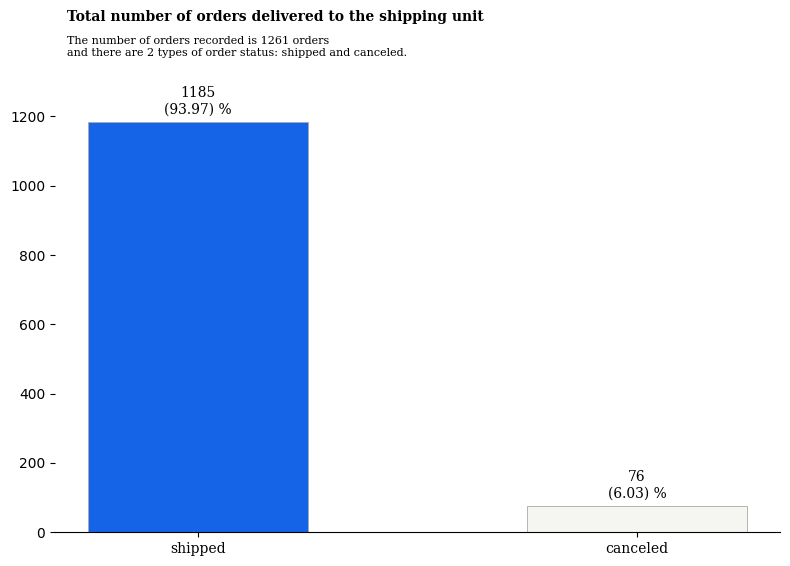

In [ ]:
# (3) order status trong 1261 giá trị không null trong carrier

# Lọc các dòng mà cột 'carrier' không có giá trị null
not_null_carrier = incompleted_orders_df[incompleted_orders_df['order_delivered_carrier_date'].notnull()]

not_null_carrier_order_state = not_null_carrier['order_status'].value_counts()

# Plot

color_map = ['#1564e8', '#f5f5f1', '#f5f5f1', '#f5f5f1', '#f5f5f1', '#f5f5f1', '#f5f5f1', '#f5f5f1']  # color highlight for the top

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar([str(idx) for idx in not_null_carrier_order_state.index], not_null_carrier_order_state, width=0.5,
              edgecolor='darkgray',
              linewidth=0.6, color=color_map)

# Annotations
highest = not_null_carrier_order_state.max() * 0.05  # Set annotation height as 5% of the highest category
total = not_null_carrier_order_state.sum()

for i, val in enumerate(not_null_carrier_order_state):
    percentage = (val/total) * 100
    ax.annotate(f"{val}\n({percentage:.2f}) %",
                xy=(i, val + highest),
                va='center', ha='center', fontweight='light', fontfamily='serif')

# Remove border from plot
for s in ['top', 'left', 'right']:
    ax.spines[s].set_visible(False)


fig.text(0.09, 1.1, 'Total number of orders delivered to the shipping unit', fontsize=10, fontweight='bold', fontfamily='serif')
fig.text(0.09, 1.03, 'The number of orders recorded is 1261 orders \nand there are 2 types of order status: shipped and canceled.'
, fontsize=8, fontweight='light', fontfamily='serif')

# Tick labels
plt.xticks(fontfamily='serif')

plt.tight_layout()
plt.show()